# Capitulo 2. Proyecto de Machine Learning

👀: verifica que si hayas instalado las librerías que vas a necesitar

En este caso se realizará un modelo para predecir la media de precios en las viviendas de los diferentes municipos de Londres, Reino Unido 🇬🇧.

## <span style="color:green">1. Descargar los datos</span>

Las bases de datos para este proyecto se puede encontrar en este enlace: https://www.kaggle.com/justinas/housing-in-london

También se pueden consultar todas las bases de datos de este curso en GitHub:https://github.com/a2Proyectos/MachineLearning_Data

Se pueden usar las siguientes paginas para sacar datos

Open world data

Aws.amazon.com 

nasdaq.com

data.london.gov.uk

Kaggle.com

- housing_in_london_yearly_variables.csv, con los datos que necesitamos para hacer la regresión.
- London_Borough_Excluding_MHW.shp, con los datos que necesitamos para graficar Londres.
- Capitulo_2/housing_in_london_monthly_variables.csv, con los datos de la media salarial

Queremos adivinar los precios de la vivienda

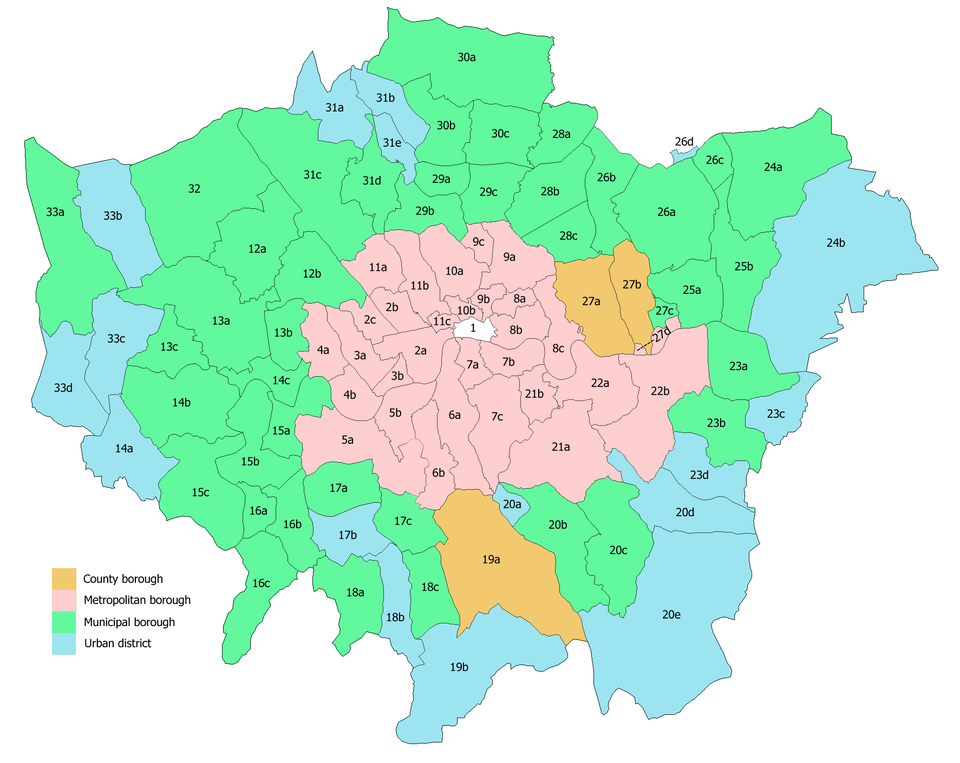
Division por distritos((Borough Flag)) nos indica si es de londres o de las afueras

Antes: Una persona, analizaba los datos, formulas y estadisticas para decidir si intervenir o no, con un margen de error mayor a una maquina, el cual en estimaciones era de un 25% de sesgo.
Ahora: ML --> Decido si invertir o no (Si mi sesgo es menor de 25%, mi ML es util, dentro de la comparativa con un humano)

#### Que nos tenemos que preguntar a ña jpra de enfrentarnos al analisis de un dataset:
    Aprendizaje supervisado  o no
        Nos vamos a fijar en si tenemos etiquietas o no
            como teneemos etiquetas, aplicaremos aprendizaje supervisado
    ¿Regresion o clasificacion?
        Que queremos hacer, predecir o clasificar...
        En nuestro caso queremos predecir el precio de una vivienda por lo oque usaremos regresion.
        Regresion:  Univariable --> pues quiero que me devuelva el dato del precio de la vivienda 
                    Multivariable
                    
    ¿Batch u Online?
        Trabajar los datos en local o recivir los datos actualizados siempre que los pido 
            Batch(local), ofrece una carga menor, guardando los datos para manipularlos.    

    ¿Que necesita mi equipo?
        Tengo que definir(y discutir) que me esta pidiendo mi equipo. (quieren que devuelva un valor o una clasificacion)
            Dependiendo de lo que nos pidan trendriamos que reconfigurar la salida de nuestro algoritmo
        

In [63]:
## Importamos nuestras librerias principales panda, numpy, matplotlib, os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [64]:
## Definimos una función para extraer datos.
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.
#DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/"
#Complementos con la dirección especifica de la base de datos que queremos.
#LONDON_SALARY = "Capitulo_2/housing_in_london_yearly_variables.csv"
#LONDON_HOUSING = "Capitulo_2/housing_in_london_monthly_variables.csv"
#LONDON_MAP = os.path.abspath("") + "\map\London_Borough_Excluding_MHW.shp"

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/"
LONDON_SALARY = "Capitulo_2/housing_in_london_yearly_variables.csv"
LONDON_HOUSING = "Capitulo_2/housing_in_london_monthly_variables.csv"
LONDON_MAP = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/Capitulo_2/map/London_Borough_Excluding_MHW.dbf"

def descarga_de_datos(root, database):
    csv_path = root + database
    return pd.read_csv(csv_path)

## <span style="color:green">2. Vistazo a la Base de Datos</span>

In [65]:
## Juntamos nuestra base de datos de la media salarial, con la de datos de Londres.
df1 = descarga_de_datos(DOWNLOAD_ROOT,LONDON_SALARY)
df2 = descarga_de_datos(DOWNLOAD_ROOT,LONDON_HOUSING)



In [66]:
df1

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,"33,020.00",NaN,48922,0,"6,581.00",NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,"21,480.00",NaN,23620,3,"162,444.00",NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,"19,568.00",NaN,23128,8,"313,469.00",NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,"18,621.00",NaN,21386,18,"217,458.00",NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,"18,532.00",NaN,20911,6,"260,317.00",NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1066,K03000001,great britain,2019-12-01,"30,446.00",NaN,37603,NaN,NaN,NaN,NaN,NaN,0
1067,K04000001,england and wales,2019-12-01,"30,500.00",NaN,37865,NaN,NaN,NaN,NaN,NaN,0
1068,N92000002,northern ireland,2019-12-01,"27,434.00",NaN,32083,NaN,NaN,NaN,NaN,NaN,0
1069,S92000003,scotland,2019-12-01,"30,000.00",NaN,34916,NaN,NaN,NaN,NaN,NaN,0


In [67]:
df2

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.00,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.00,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.00,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.00,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.00,NaN,1
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,"64,605.00",NaN,0
13545,2019-10-01,england,249376,E92000001,"68,677.00",NaN,0
13546,2019-11-01,england,248515,E92000001,"67,814.00",NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0


In [68]:
#Filtrar los datos 

#df = df[df["average_price"].notnull()]  # casas con precio disponible
#df = df[df["median_salary"].notnull()]  # municipios con salario disponible

df1 = df1.filter(items=["median_salary","area","date"])
df1.head()

,median_salary,area,date
0,"33,020.00",city of london,1999-12-01
1,"21,480.00",barking and dagenham,1999-12-01
2,"19,568.00",barnet,1999-12-01
3,"18,621.00",bexley,1999-12-01
4,"18,532.00",brent,1999-12-01


In [69]:
data

,index,median_salary,area,date,average_price,code,houses_sold,no_of_crimes,borough_flag,salary_cat
0,0,"33,020.00",city of london,1999-12-01,169309,E09000001,97.00,NaN,1,3
1,1,"21,480.00",barking and dagenham,1999-12-01,68812,E09000002,267.00,NaN,1,2
2,2,"19,568.00",barnet,1999-12-01,149510,E09000003,619.00,NaN,1,1
3,3,"18,621.00",bexley,1999-12-01,93905,E09000004,460.00,NaN,1,1
4,4,"18,532.00",brent,1999-12-01,123398,E09000005,395.00,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...
876,896,"28,536.00",west midlands,2019-12-01,199814,E12000005,NaN,NaN,0,2
877,897,"38,992.00",london,2019-12-01,481710,E12000007,NaN,NaN,0,3
878,898,"32,120.00",south east,2019-12-01,324515,E12000008,NaN,NaN,0,3
879,899,"28,654.00",south west,2019-12-01,259011,E12000009,NaN,NaN,0,2


In [70]:
#Fusionar los dos dataframe
data = pd.merge(df1, df2)
data.head()

,median_salary,area,date,average_price,code,houses_sold,no_of_crimes,borough_flag
0,"33,020.00",city of london,1999-12-01,169309,E09000001,97.00,NaN,1
1,"21,480.00",barking and dagenham,1999-12-01,68812,E09000002,267.00,NaN,1
2,"19,568.00",barnet,1999-12-01,149510,E09000003,619.00,NaN,1
3,"18,621.00",bexley,1999-12-01,93905,E09000004,460.00,NaN,1
4,"18,532.00",brent,1999-12-01,123398,E09000005,395.00,NaN,1


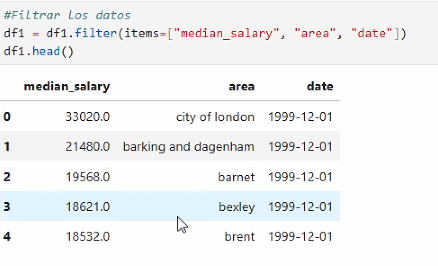

In [71]:
# Obtener información de los datos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median_salary  881 non-null    float64
 1   area           903 non-null    object 
 2   date           903 non-null    object 
 3   average_price  903 non-null    int64  
 4   code           903 non-null    object 
 5   houses_sold    860 non-null    float64
 6   no_of_crimes   617 non-null    float64
 7   borough_flag   903 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 56.6+ KB


👀:Comienza a ver el tipo de variable, de eso depende el análisis que le demos o si necesitamos cambiarlas a otro tipo de variable

***

In [72]:
# Una forma muy común para saber que tipo de datos contiene alguna variable de tipo objeto, es contar sus valores, ejemplo:
data["area"].value_counts()


area
city of london            21
barking and dagenham      21
barnet                    21
bexley                    21
brent                     21
bromley                   21
camden                    21
croydon                   21
ealing                    21
enfield                   21
greenwich                 21
hackney                   21
hammersmith and fulham    21
haringey                  21
harrow                    21
havering                  21
hillingdon                21
hounslow                  21
islington                 21
kensington and chelsea    21
kingston upon thames      21
lambeth                   21
lewisham                  21
merton                    21
newham                    21
redbridge                 21
richmond upon thames      21
southwark                 21
sutton                    21
tower hamlets             21
waltham forest            21
wandsworth                21
westminster               21
north east                21
north wes

In [73]:
# Una forma muy utilizada para obtener información de nuestros datos numéricos es el método describe(), ejemplo:
pd.options.display.float_format="{:,.2f}".format
data.describe()

,median_salary,average_price,houses_sold,no_of_crimes,borough_flag
count,881.00,903.00,860.00,617.00,903.00
mean,"28,789.28","309,916.87","3,853.29","2,038.09",0.77
std,"6,508.32","187,527.43","12,917.66",879.52,0.42
min,"15,684.00","48,298.00",6.00,0.00,0.00
25%,"24,582.00","189,287.00",246.00,"1,542.00",1.00
50%,"28,284.00","260,893.00",351.00,"2,008.00",1.00
75%,"31,589.00","387,597.00",626.00,"2,402.00",1.00
max,"61,636.00","1,364,185.00","119,458.00","7,461.00",1.00


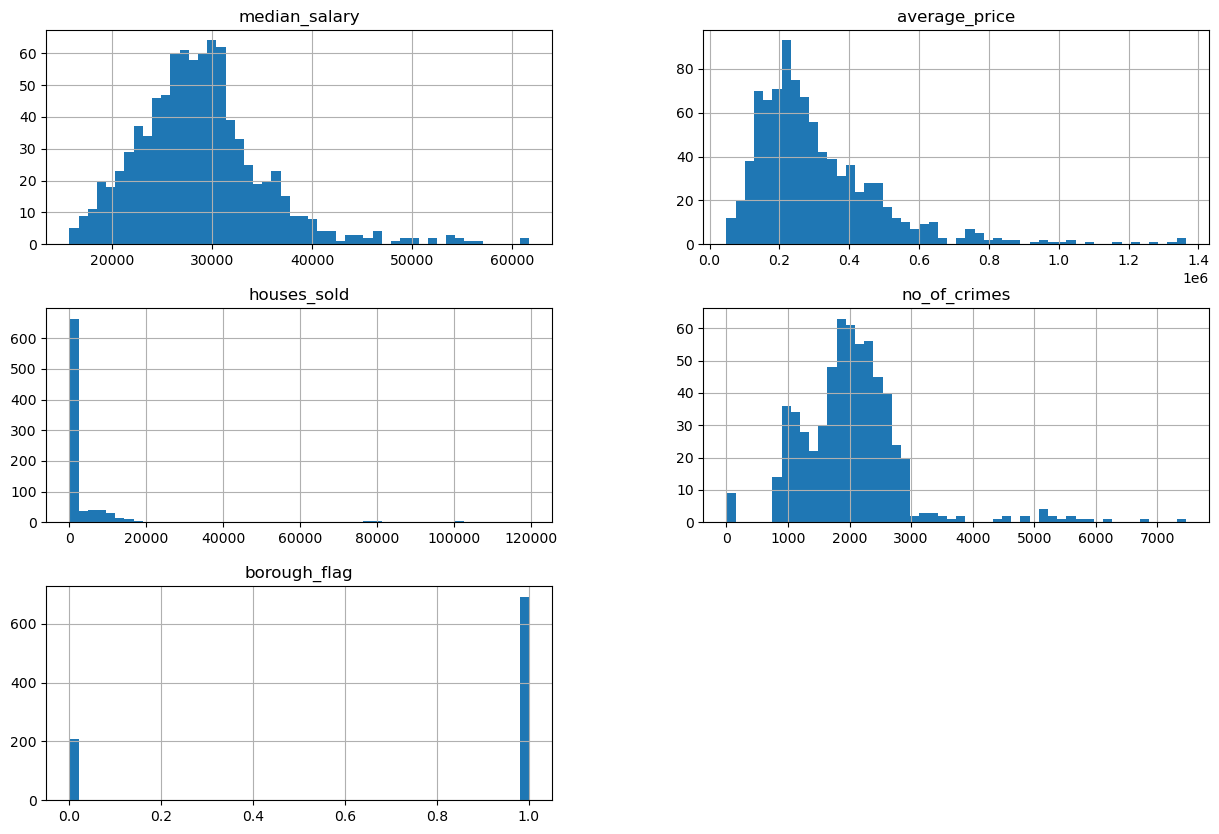

In [74]:
# Realiza un Histograma para visualizar los datos 
#matplotlib inline para aquellos que estan con jupyter notebook
#plt.hist(df["average_price"], density = True, bins = 50)
#plt.show()

data.hist(bins =50,figsize=(15,10))
plt.show()

***

## <span style="color:green">3. Crear un set de entrenamiento y de prueba </span>

Recuerden que nuestro set de prueba lo pondremos de lado por ahora, sin verlo. No sean tramposos ❌

In [75]:
#Importamos la función para dividir los datos train_test_split
from sklearn.model_selection import train_test_split

In [76]:
# Seleccionamos por ejemplo, el 30% de los datos para el set de prueba
#Random_state es la semilla que se usa para generar números aleatorios.
set_ent,set_prueba = train_test_split(data, test_size = 0.3, random_state = 11)

In [77]:
#confirmamos la división
print(len(set_ent), len(set_prueba))

632 271


Ya tenemos nuestro set de prueba y nuestro set de entrenamiento ✅

***

### <span style="color:blue">3.1 Evitar Sesgo </span>

<Axes: >

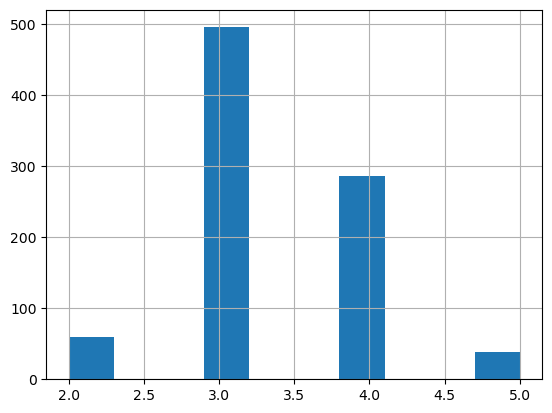

In [78]:
# Para categorizar una variable, ejemplo con 5 niveles. 
data["salary_cat"] = pd.cut(data["median_salary"], bins =[0.,10000,20000,30000,40000,np.inf],labels = [1,2,3,4,5])
                           
#Hacer un histograma de las categorías
data["salary_cat"].hist()

In [79]:
#Verificar que no existen datos en el bin #1
data["salary_cat"].value_counts()

salary_cat
3    496
4    287
2     59
5     39
1      0
Name: count, dtype: int64

<Axes: >

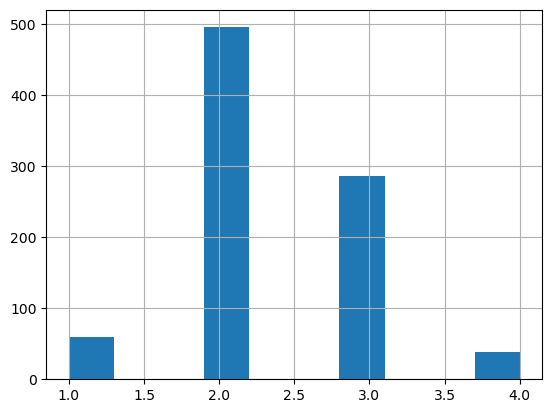

In [80]:
# Redefinir en 4 catedata = data.dropna()gorías, quitando en donde no hay datos (el bin#1)
data = data.dropna(subset=["median_salary"])
data = data.reset_index()
data["salary_cat"] = pd.cut(data["median_salary"], bins =[10000,20000,30000,40000,np.inf],labels = [1,2,3,4])
data["salary_cat"].hist()

In [81]:
#Verifica que si se redefinieron las categorías 
data["salary_cat"].value_counts()

salary_cat
2    496
3    287
1     59
4     39
Name: count, dtype: int64

In [82]:
## Dividir datos basándonos en nuestras categorías de salarios
from sklearn.model_selection import StratifiedShuffleSplit



In [83]:
# Generamos nuestro objeto para que lo divida en 30% y solo haga una división
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3 , random_state=11)

In [84]:
# Creamos nuestras variables basándonos en nuestras categorías
for ent_index, prueba_index in split.split(data, data["salary_cat"]): # define de nuevo, entrenamiento y prueba pero tenieno en cuenta las nuevas etiquetas para eliminar sesgo
    cat_set_ent = data.loc[ent_index]
    cat_set_prueba = data.loc[prueba_index]

In [85]:
# Comprobación. Ya en porcentaje
cat_set_prueba["salary_cat"].value_counts()

salary_cat
2    149
3     86
1     18
4     12
Name: count, dtype: int64

***

In [86]:
# Creamos dataframe para trabajar con el set de entrenamiento
df = cat_set_ent.copy()
# esto es para no modificar el punto en memoria(creamos una copia)
df.head()

,index,median_salary,area,date,average_price,code,houses_sold,no_of_crimes,borough_flag,salary_cat
413,427,"35,774.00",inner london,2008-12-01,303759,E13000001,"1,642.00",NaN,0,3
297,310,"25,088.00",enfield,2006-12-01,227042,E09000010,526.00,"1,868.00",1,2
545,559,"54,000.00",city of london,2012-12-01,491529,E09000001,28.00,NaN,1,4
677,692,"29,987.00",brent,2015-12-01,468584,E09000005,202.00,"2,213.00",1,2
815,832,"30,181.00",havering,2018-12-01,372295,E09000016,262.00,"1,590.00",1,3


## <span style="color:green">4. Visualizar los Datos Gráficamente </span>


Para esto vamos a necesitar, en conjunto con nuestro dataset LONDON_MAP, una nueva libreria que se llama geopandas, el cual exteiende la libreria pandas, para trabajar con datos geoespaciales, se puede encontrar más información en: https://geopandas.org/getting_started/introduction.html

In [87]:
#Importar geopandas
import geopandas as gdp

#Leer el mapa
londres_map = gdp.read_file(LONDON_MAP)
londres_map.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,"3,726.12",0.00,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,"8,649.44",0.00,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,"15,013.49",0.00,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,"5,658.54",60.76,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,"5,554.43",0.00,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


<Axes: >

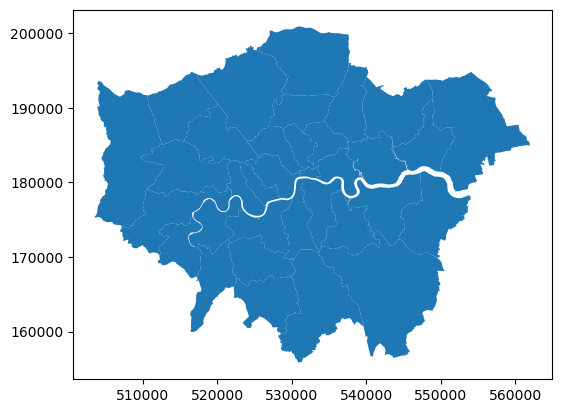

In [88]:
# Graficamos el mapa
londres_map.plot()

***

In [89]:
# Ajustamos los nombres de las columnas para despúes hacer un merge.
#utilizar lower para cambiar de mayúsculas a minúsculas 
londres_map.columns = londres_map.columns.str.lower()
londres_map = londres_map.rename({"name":"area","gss_code":"code"},axis =1)
londres_map["area"] = londres_map["area"].str.lower()

#Seleccionar columnas necesarias
londres_map = londres_map.filter(items = ["area","code","hectares","geometry",])
londres_map.head()

,area,code,hectares,geometry
0,kingston upon thames,E09000021,"3,726.12","POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,croydon,E09000008,"8,649.44","POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,bromley,E09000006,"15,013.49","POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,hounslow,E09000018,"5,658.54","POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,ealing,E09000009,"5,554.43","POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


In [90]:
# Seleccionar datos de nuestro set de entrenamiento
df_m = df.groupby("area").agg({"average_price": ["mean"],"houses_sold": "sum" }) # apartir de area se haga una agrupacion de las medias y que las casas se sumen todas


# Le asignamos nombre a las columnas del nuevo dataframe y reseteamos el indice
df_m.columns = ["average_price","houses_sold"]
df_m.reset_index(inplace=True)
df_m.head()

,area,average_price,houses_sold
0,barking and dagenham,"168,421.00","2,188.00"
1,barnet,"355,681.32","7,847.00"
2,bexley,"207,725.47","4,662.00"
3,brent,"321,362.75","3,659.00"
4,bromley,"268,248.85","6,646.00"


In [91]:
# Combinar dtaframes
londres_map = pd.merge(londres_map,df_m,on="area")
londres_map.head()

,area,code,hectares,geometry,average_price,houses_sold
0,kingston upon thames,E09000021,"3,726.12","POLYGON ((516401.6 160201.8, 516407.3 160210.5...","319,607.31","3,168.00"
1,croydon,E09000008,"8,649.44","POLYGON ((535009.2 159504.7, 535005.5 159502, ...","244,736.65","7,352.00"
2,bromley,E09000006,"15,013.49","POLYGON ((540373.6 157530.4, 540361.2 157551.9...","268,248.85","6,646.00"
3,hounslow,E09000018,"5,658.54","POLYGON ((521975.8 178100, 521967.7 178096.8, ...","271,604.13","3,787.00"
4,ealing,E09000009,"5,554.43","POLYGON ((510253.5 182881.6, 510249.9 182886, ...","301,230.31","5,764.00"


***

In [92]:
londres_map.plot?

Signature:      londres_map.plot(*args, **kwargs)
Type:           GeoplotAccessor
String form:    <geopandas.plotting.GeoplotAccessor object at 0x000001AC6F63B6F0>
File:           c:\users\techie3\anaconda3\lib\site-packages\geopandas\plotting.py
Docstring:     
Plot a GeoDataFrame.

Generate a plot of a GeoDataFrame with matplotlib.  If a
column is specified, the plot coloring will be based on values
in that column.

Parameters
----------
column : str, np.array, pd.Series, pd.Index (default None)
    The name of the dataframe column, np.array, pd.Series, or pd.Index
    to be plotted. If np.array, pd.Series, or pd.Index are used then it
    must have same length as dataframe. Values are used to color the plot.
    Ignored if `color` is also set.
kind: str
    The kind of plots to produce. The default is to create a map ("geo").
    Other supported kinds of plots from pandas:

    - 'line' : line plot
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : his

(np.float64(500648.735),
 np.float64(564876.965),
 np.float64(153596.645),
 np.float64(203188.055))

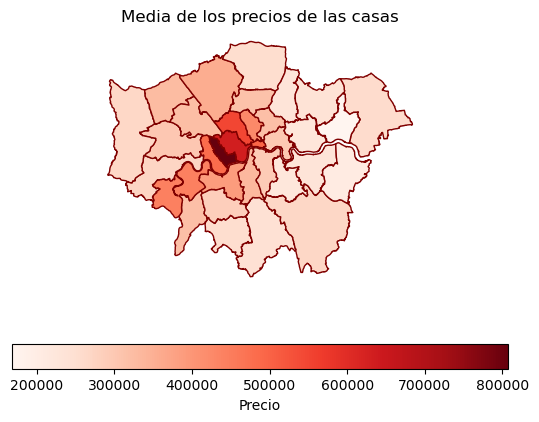

In [93]:
#Gráfica del promedio de los precios en las casas 
#Cuando se grafica en geopandas hay muchos argumentos, no se desesperen si no los recuerdan, es normal. 
plt = londres_map.plot(column = "average_price", # columna en la que se basa la grafica
                       cmap = "Reds", # color gradiente de la grafica
                       edgecolor ="maroon", #color de controno
                       legend = True , legend_kwds = {"label":"Precio","orientation":"horizontal"}) # leyenda
plt.set_title("Media de los precios de las casas")
plt.axis("off")

💸: Recuerden que los precios son mayores en el centro de la cuidad

(np.float64(500648.735),
 np.float64(564876.965),
 np.float64(153596.645),
 np.float64(203188.055))

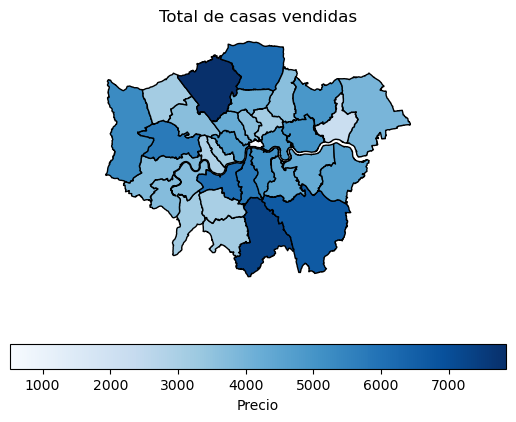

In [94]:
#Graficar ahora el total de las casa vendidas (utilizar el código anterior para no repetir)
plt = londres_map.plot(column = "houses_sold", # columna en la que se basa la grafica
                       cmap = "Blues", # color gradiente de la grafica
                       edgecolor ="Black", #color de controno
                       legend = True , legend_kwds = {"label":"Precio","orientation":"horizontal"}) # leyenda
plt.set_title("Total de casas vendidas")
plt.axis("off")

**Ejercicio:** Incluir en el análisis los salarios promedio por zona (apoyarse del video 21)

(np.float64(500648.735),
 np.float64(564876.965),
 np.float64(153725.58),
 np.float64(200480.42))

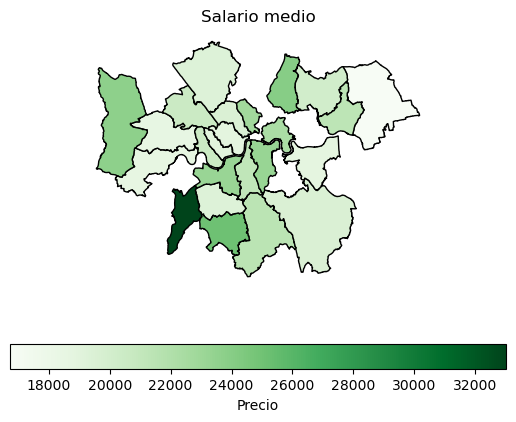

In [95]:
londres_map["median_salary"] = df["median_salary"]
plt = londres_map.plot(column = "median_salary", # columna en la que se basa la grafica
                       cmap = "Greens", # color gradiente de la grafica
                       edgecolor ="Black", #color de controno
                       legend = True , legend_kwds = {"label":"Precio","orientation":"horizontal"}) # leyenda
plt.set_title("Salario medio")
plt.axis("off")

***

## <span style="color:green">5. Medir la Correlación </span>


La correlacion es la relacion lineal que existe entre dos conjuntos de datos y su valor esta siempre entre-1 y 1 

    **+1 Correlacion positiva perfecta, las variables se mueven en la misma direccion (Si una sube la otra tambien). metros cuadrados de una casa // precio
    **0 Sin correlacion, no hay relacion lineal y el movimiento de una no afecta a la otra. metros cuadrados de una casa // nº de crimenes
    **-1 Negativa perfecta Las variables se mueven en direcciones opuestas. Los km que recorre una persona y su peso reducido.

In [96]:
# filtrar numeric columns

numeric_df = df.select_dtypes(include=['number']) # selecciona valores numericos

#crear matriz de correlacion

matriz = numeric_df.corr(method="pearson")

#comparar correlacion

matriz["average_price"].sort_values(ascending=False)


average_price    1.00
median_salary    0.66
index            0.58
borough_flag     0.31
no_of_crimes     0.20
houses_sold     -0.19
Name: average_price, dtype: float64

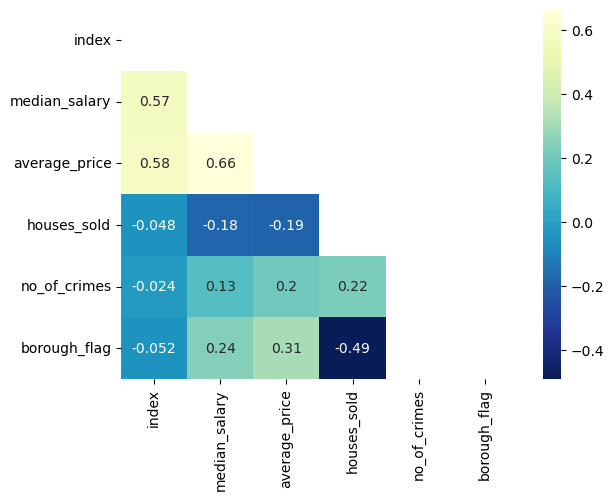

In [97]:
#Importar seaborn 

import seaborn as sns
# Crear vector
mask = np.triu(np.ones_like(matriz, dtype=bool))

# Graficar

plt = sns.heatmap(matriz, mask = mask, annot= True, cmap = "YlGnBu_r")

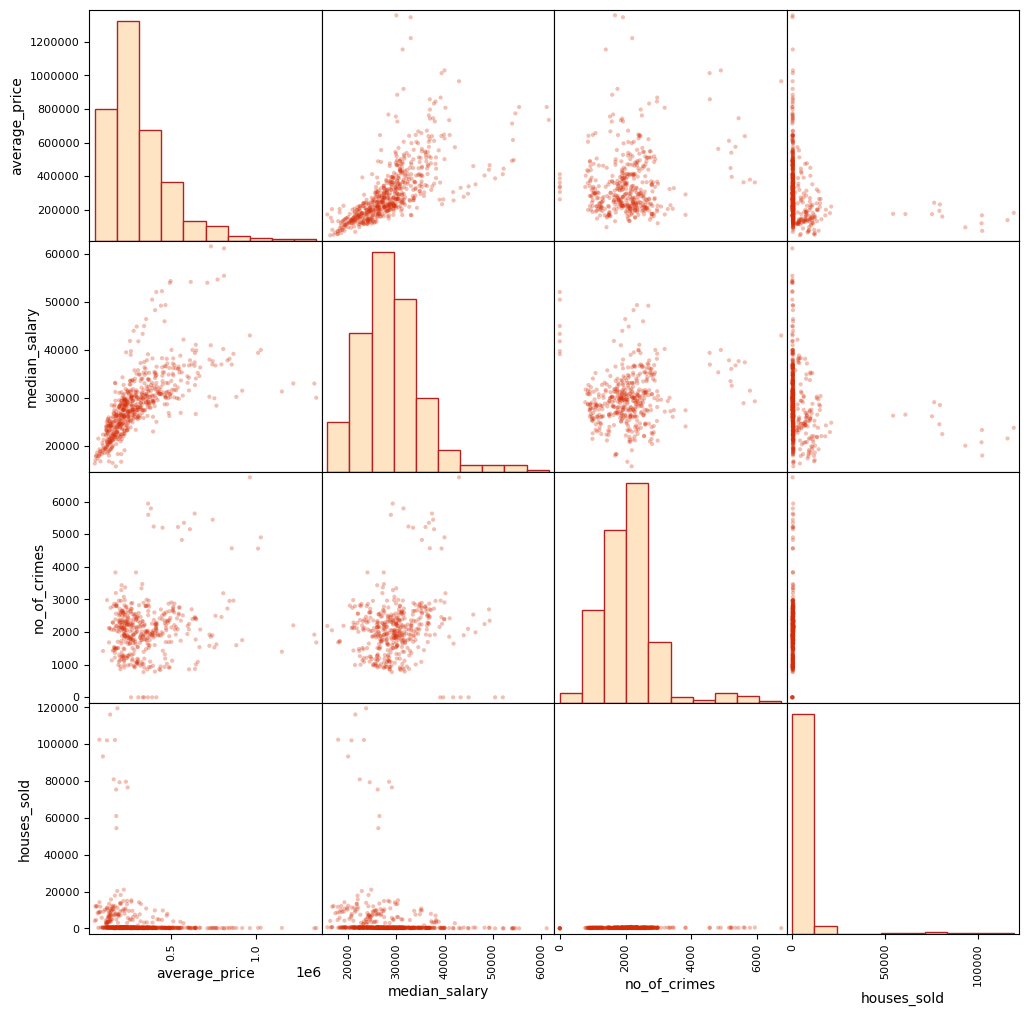

In [98]:
#Importar pandas 
from pandas.plotting import scatter_matrix

#Para graficar scatter_matrix...

columns = ["average_price","median_salary","no_of_crimes","houses_sold"]
scatter_matrix(df[columns],figsize = (12,12), color ="#D52b06",alpha = 0.3, hist_kwds={"color":["bisque"],"edgecolor":"firebrick"});
# se le pone corchete a uno y al otro no por convenio

<Axes: xlabel='median_salary', ylabel='average_price'>

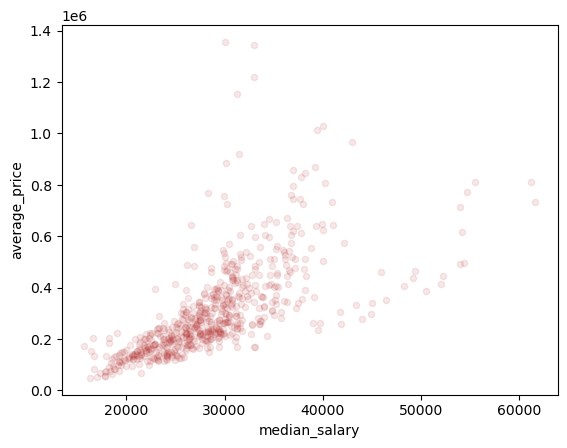

In [99]:
#Por si quieren ver una gráfica en específico más a detalle
df.plot(kind ="scatter", x = "median_salary", y = "average_price", color ="Firebrick",alpha = 0.1) # alpha para ver mejor la concentracion, puedes probar con o sin

***

## <span style="color:green">6. Combinación de Variables </span>


Buscamos crear variables sinteticas a partir de las existentes o comprobar que variables (incluyendo las sinteticas) tienen la corellacion mas alta con el "average_price" en este caso, ya que es la variable a predecir

In [100]:
#Armar una columna para hacer las combinaciones que necesitamos
df["mas_crimen_por_casa"] = df["houses_sold"] + df["no_of_crimes"]
# Crear matriz de correlación

numeric_df = df.select_dtypes(include=['number']) # selecciona valores numericos
matriz = numeric_df.corr(method="pearson")
matriz["average_price"].sort_values(ascending=False)

average_price          1.00
median_salary          0.66
index                  0.58
borough_flag           0.31
no_of_crimes           0.20
mas_crimen_por_casa    0.15
houses_sold           -0.19
Name: average_price, dtype: float64

***

***

## <span style="color:Blue">7. Transformación de Datos </span> Ya hemos observado los datos, ahora vamos a prepararlos (limpiarlos)


In [101]:
# Crear Dataframe de predictores y variable a predecir ✂️
df_label = cat_set_ent["average_price"] # Cojo una sola columna de la cual sacaré las metricas de mis predicciones
#Nuevo dataframe sin average_price
df = cat_set_ent.drop("average_price", axis = 1) # De la anterior copia saco la average_price que ya tengo en df_label

In [102]:
df_label.head()

413    303759
297    227042
545    491529
677    468584
815    372295
Name: average_price, dtype: int64

***

##### Opciones cuando nos faltan datos

    1- Eliminar cada linea que tiene algo vacio, demasiado destructivo al no tener tantos datos, se nos muere el modelo(pierde precision porque no tiene tantos datos completos para compensar la pedida)
    
    2- Eliminar los datos vacios(Columnas del df)
    
    3- Rellenar los datos vacios con promedios

In [103]:
#Darte una idea de a qué variables le hace faltan datos

#Calcular la suma de todos los vacíos  
df.isna().sum()

index              0
median_salary      0
area               0
date               0
code               0
houses_sold       26
no_of_crimes     188
borough_flag       0
salary_cat         0
dtype: int64

In [104]:
#Quitar el número de crímenes por su alta cantidad de datos vacíos 
df = df.drop("no_of_crimes",axis = 1) # es una fuente de info valiosa pero consideramos que en este caso al haber tantos huecos vacios no puedo predecir sus valores correctamente y preferimos eliminar la variable del modelo

In [105]:
#Tomamos la media 
median = df["houses_sold"].median() # saca la mediana
#Llenamos los valores con la media
df["houses_sold"].fillna(median, inplace = True) # aplica la tercera opcion de rellenar con la media los huecos vacios
#Verifica que no hay datos vacíos
df.isna().sum()

C:\Users\Techie3\AppData\Local\Temp\ipykernel_2568\823053301.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["houses_sold"].fillna(median, inplace = True) # aplica la tercera opcion de rellenar con la media los huecos vacios


index            0
median_salary    0
area             0
date             0
code             0
houses_sold      0
borough_flag     0
salary_cat       0
dtype: int64

***

Recuerden que volvimos a ejecutar la línea de código de "df = cat_set_ent.drop('average_price', axis=1)" para hacer este ejercicio

In [106]:
#BIENVENIDOS A SCIKIT <3 Serán unos expertos al final. (rellenar con pandas puede dar problemas, vamos a hacer lo mismo con sckitlearn)
# Rellenar valores con scikit
#1. Recuerden: importar lo que vayas a utiliza, en este caso SimpleImputer
from sklearn.impute import SimpleImputer

# 2. Crear objeto, en este caso se llamará imputer

imputer = SimpleImputer(strategy = "median")

# el siguiente codigo se quita porque ya lo habiamos borrado anteriormente
#df.isna().sum()
#df = df.drop(["no_of_crimes"],axis = 1)
#df.info()


# data numérico

df_num = df.drop(["area","date","code"],axis=1)

#Ejecuta Imputer

imputer.fit(df_num) # calcular las medianas de cada columna

#Aplicar transform para rellenar las medianas 

X = imputer.transform(df_num) # rellena cada columna con sus medianas

#Regresarlo a dataframe 

df_tr = pd.DataFrame(X, columns=df_num.columns, index = df_num.index)
df_tr.head()

,index,median_salary,houses_sold,borough_flag,salary_cat
413,427.00,"35,774.00","1,642.00",0.00,3.00
297,310.00,"25,088.00",526.00,1.00,2.00
545,559.00,"54,000.00",28.00,1.00,4.00
677,692.00,"29,987.00",202.00,1.00,2.00
815,832.00,"30,181.00",262.00,1.00,3.00


***

## <span style="color:Blue">8. Manejo de texto y valores categóricos </span>

Quiero pasar area o code a valores ordinales apra aplicarlos enla prediccion lo que es ordenar los distritos en orden alfabetico y coger su indice

In [107]:
#definir que variable vamos a cambiar a valor numérico
df_cat = df[["area"]]
#Convertir variables de texto en numéricas
from sklearn.preprocessing import OrdinalEncoder
#verificar que si se haya transformado
ordinal_encoder = OrdinalEncoder()
df_oe = ordinal_encoder.fit_transform(df_cat)
#Por si quieres ver como funciona el encoder
df_oe[:10]

array([[20.],
       [10.],
       [ 6.],
       [ 3.],
       [17.],
       [ 4.],
       [28.],
       [35.],
       [33.],
       [ 8.]])

In [108]:
#Por si quieres ver como funciona el encoder
ordinal_encoder.categories_

[array(['barking and dagenham', 'barnet', 'bexley', 'brent', 'bromley',
        'camden', 'city of london', 'croydon', 'ealing', 'east midlands',
        'enfield', 'england', 'greenwich', 'hackney',
        'hammersmith and fulham', 'haringey', 'harrow', 'havering',
        'hillingdon', 'hounslow', 'inner london', 'islington',
        'kensington and chelsea', 'kingston upon thames', 'lambeth',
        'lewisham', 'london', 'merton', 'newham', 'north east',
        'north west', 'outer london', 'redbridge', 'richmond upon thames',
        'south east', 'south west', 'southwark', 'sutton', 'tower hamlets',
        'waltham forest', 'wandsworth', 'west midlands', 'westminster'],
       dtype=object)]

In [109]:
#ONE HOT ENCODER, es importante recordar y entender esta función porque la usaremos en todo el curso
#Convertir variables categóricas en binarias
#Importar OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
#Crear objeto
encoder = OneHotEncoder()
#Ajustar
df_1hot = encoder.fit_transform(df_cat)
#obligar a que nos muestre la matriz 
df_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

***

## <span style="color:Blue">9. Escalación de variables </span>


In [110]:
df["houses_sold"].mean()

np.float64(3666.237012987013)

In [111]:
df_label.mean()

np.float64(309551.88474025973)

In [112]:
prueba = pd.DataFrame({"col1":[100,200,300,999],"col2":[1000,2000,3000,9999],"col3":[-10,0,1,2]})
prueba

,col1,col2,col3
0,100,1000,-10
1,200,2000,0
2,300,3000,1
3,999,9999,2


#### <span style="color:Blue">9.1 Normalización </span>

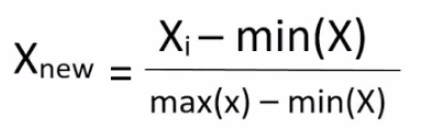

In [113]:
#Importar MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
#Creamos el objeto 
scaler = MinMaxScaler()
#Hacer un dataframe con la transformación
pd.DataFrame(scaler.fit_transform(prueba), columns=prueba.columns, index=prueba.index)

,col1,col2,col3
0,0.00,0.00,0.00
1,0.11,0.11,0.83
2,0.22,0.22,0.92
3,1.00,1.00,1.00


#### <span style="color:Blue">9.2 Estandarización </span>

In [114]:
## Estandarización (Es el más ultizado)
#Importar StandardScaler (presten especial atención a StandardScaler lo estaremos viendo muy seguido) 
from sklearn.preprocessing import StandardScaler

#Crea objeto
scaler = StandardScaler()
#Hacer un dataframe con la transformación
pd.DataFrame(scaler.fit_transform(prueba), columns=prueba.columns, index=prueba.index)

,col1,col2,col3
0,-0.85,-0.85,-1.71
1,-0.57,-0.57,0.36
2,-0.28,-0.28,0.57
3,1.70,1.70,0.78


In [115]:
La estandarizacion asegura que, despues de la tranformacion cada columna(variable) tendrá una media de 0 y una desviacion estandar de 1.
Esto es necesario porque, sin estandarizar, una columna con valores muy grandes podria dominar la distancia y el calculo en el model haciendo que el impacto de una columna con valores pequeños sea insignificante, la estandarizacin pone a todas las variables en la misma

SyntaxError: invalid syntax (2304731230.py, line 1)

***

## <span style="color:Blue">10. Pipeline </span>


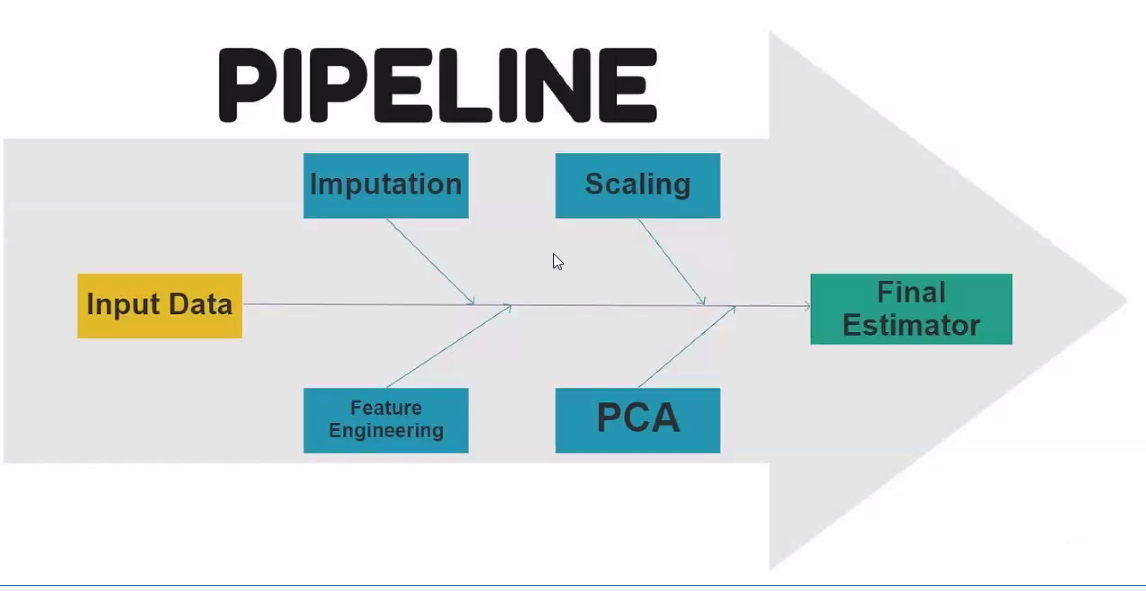

In [116]:
# Crear función de pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
pipeline = Pipeline([("remover",RobustScaler()),("rellenar",SimpleImputer(strategy="median")),("escalar",StandardScaler())])

pd.DataFrame(pipeline.fit_transform(prueba), columns=prueba.columns,index=prueba.index)

,col1,col2,col3
0,-0.85,-0.85,-1.71
1,-0.57,-0.57,0.36
2,-0.28,-0.28,0.57
3,1.70,1.70,0.78


In [117]:
# Column Transformer (nos permite transformar varias columnas al mismo tiempo y luego juntarlas)
from sklearn.compose import ColumnTransformer
num= list(df_num)
cat = ["area"]

pipeline_completo = ColumnTransformer([("num", pipeline, num),("cat",OneHotEncoder(),cat)])
#Hacer un datframe que usaremos para la regresión linea
df_preparado = pipeline_completo.fit_transform(df)
#Visualiza los datos 
df_preparado.toarray()

array([[-0.06423908,  1.029095  , -0.15368266, ...,  0.        ,
         0.        ,  0.        ],
       [-0.52141685, -0.56425022, -0.2384108 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.45155122,  3.74669839, -0.2762196 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.06455968, -1.21763209,  7.47093926, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.38121618,  0.14266066, -0.26278153, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17411856, -0.09501408, -0.26118718, ...,  0.        ,
         0.        ,  0.        ]])

***

***

## <span style="color:purple">11. Seleccionar y entrenar modelos </span>

In [118]:
## Hacer Regresión Lineal (AL FIN)
from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression()
reg_lin.fit(df_preparado,df_label)

algunos_datos = df.iloc[:5]
datos_predecir = df_label.iloc[:5]
datos_tranformados = pipeline_completo.transform(algunos_datos)

print("Prediccion", reg_lin.predict(datos_tranformados))
print("\nOriginales:", list(datos_predecir))

Prediccion [341100.16718624 205477.1095623  547797.71650458 414420.99960265
 407671.95904342]

Originales: [303759, 227042, 491529, 468584, 372295]


In [119]:
#Análisis preambultario de los errores
algunos_datos = df.iloc[:5]
datos_predecir = df_label.iloc[:5]
datos_tranformados = pipeline_completo.transform(algunos_datos)

vp= list(reg_lin.predict(datos_tranformados))
vr= list(datos_predecir)

vp = pd.Series(vp)
vr = pd.Series(vr)

abs((vr-vp)/vr).mean() # error promedio de prediccion de los primeros 5 valores

np.float64(0.10860035016307064)

***

#### <span style="color:purple">11.1 RMSE </span>

In [145]:
# Calcular el promedio de la suma de los errores al cuadrado RMSE
from sklearn.metrics import mean_squared_error
prediccion = reg_lin.predict(df_preparado)
error = mean_squared_error(df_label,prediccion)
error = np.sqrt(error)
error

np.float64(64654.33804450009)

In [146]:
#Sacar el promedio 
df_label.mean()

np.float64(309551.88474025973)

In [147]:
#Calcular el porcentaje de acierto
print(f'el % de error relativo es: {error/df_label.mean()*100:.2f}%')

el % de error relativo es: 20.89%


***

#### <span style="color:purple">11.2 Árbol de Decisión </span>

In [148]:
# importar DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
#crear objeto 
reg_arbol = DecisionTreeRegressor()
#correrlo
reg_arbol.fit(df_preparado,df_label)
prediccion = reg_arbol.predict(df_preparado)

#calcular el error
error = mean_squared_error(df_label,prediccion)
error = np.sqrt(error)
error

np.float64(0.0)

cuidado con el overfitting, se nos ha ajustado tanto el modelo a los datos que tenemos que cuando intentamos predecir un elemento con datos externos no lo hace bien

***

#### <span style="color:purple">11.3 Validación Cruzada </span>

¡Anota esto porque es importante!

In [149]:
#Importar cross_val_score, creo objeto, corro mi función
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(reg_arbol, df_preparado,df_label,scoring="neg_mean_squared_error", cv = 10)
rmse= np.sqrt(-resultados)
rmse

array([104125.53595757,  59244.72252269,  57230.14495749,  56294.36692827,
        61794.47941218,  82375.912095  ,  80545.93920792,  74088.66172751,
        66001.00861549,  63483.89929557])

In [150]:
#Calcular el porcentaje de error promedio de prediccion pasando por una validacion cruzada
print(f'el % de error relativo es: {rmse.mean()/df_label.mean()*100:.2f}%')

el % de error relativo es: 22.78%


***

#### <span style="color:purple">11.4 Bosque Aleatorio </span>
¡Este también es importante!
Crea varios arboles de decision, por dentro se vota y el que esta acertando mas es el que saca, consume muchos recursos, pero es un buen filtro, normalmente es demasiado costoso cuando hay mucha informacion.

Dicho de otro modo, es un conjunto de arboles de decision, cada uno saca un valor y se hace la media, para sacar un promedio que sera el resultado final.

        Objetivo: Ver si jay algo mejor que la regresion linal para calcular lo que queremos

        Este proceso tarda mas pero para muchos es la opcion ideal pues, sin pensar ya hacen un filtro correcto

In [151]:
#Importar RandomForestRegressor, creo objeto, corro mi función
from sklearn.ensemble import RandomForestRegressor
reg_forest = RandomForestRegressor()
reg_forest.fit(df_preparado,df_label)
prediccion = reg_forest.predict(df_preparado)

#calcular el error
error = mean_squared_error(df_label,prediccion)
error = np.sqrt(error)
error

np.float64(20258.397527462446)

In [152]:
#Calcular el el promedio de la suma de los errores al cuadrado
resultados = cross_val_score(reg_forest, df_preparado,df_label,scoring="neg_mean_squared_error", cv = 10)
rmse= np.sqrt(-resultados)
rmse

array([89215.69965076, 54578.48522469, 44957.45369634, 58426.89028413,
       49299.21272588, 52559.90873303, 76870.22600762, 55885.35889523,
       56617.35690225, 47860.90515714])

In [153]:
#Calcular el porcentaje de acierto de bosque aleatorio
print(f'el % de error relativo es: {rmse.mean()/df_label.mean()*100:.2f}%')

el % de error relativo es: 18.94%


(Si estamos en una empresa normalita de analisis de daots haremos siempre el bosque aleatorio que es mas rapido que buscar la opcion mas optima, si estamos en una empresa importante, buscaremos la opcion mas optima)

***

## <span style="color:purple">12. Afinar el modelo </span>

Ajustar los hiperparametros: en este caso los modificables en el bosque aleatorio son nº de estimadores y la mayr canitdad de variables

### <span style="color:purple">12.1 Grid Search</span> Va a hacer un modelo con varios ajustes en lo shiperparametros hasta que encuentre el mas adeacuado

In [143]:
#Importar GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = [{"n_estimators":[3,10,30], "max_features":[2,4,6,8]}] # Alguna Combinacion de estas 2 nos va a dar el mejor resultado
# le damos una serie de opciones, en este caso el numero de estimadores y las caracteristicas maximas

grid_search = GridSearchCV(reg_forest,param_grid,cv= 5,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(df_preparado,df_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [135]:
# calcular el mejor parametro
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [136]:
#Ver el error
np.sqrt(-grid_search.best_score_)

np.float64(63321.92666998213)

In [137]:
print(f'el % de error relativo es: {np.sqrt(-grid_search.best_score_)/df_label.mean()*100:.2f}%')

el % de error relativo es: 20.46%


***

Estructura de 3 pipelines

filtros normales

arboles de decision

y un grid que recoga todo


In [141]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

# Dataset teorico
numeric_features = ["edad","salario_anual","antiguedad"]
categorical_features = ["ciudad","tipo_contrato"]

# Creacion de transformadores o filtros
numeric_transformer = Pipeline(steps = [("imputer",SimpleImputer(strategy="mean")),("scaler",StandardScaler())]) # transformacion de las columnas numericas 
categorical_tranformer = Pipeline(steps = [("imputer",SimpleImputer(strategy="most_frequent")),("onehot",OneHotEncoder(handle_unknown="ignore"))]) # tranformacion de las columnas categoricas

# Unir Transformadores en el pre-procesador (ColumnTransformer)
preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer,numeric_features),("cat", categorical_tranformer, categorical_features)], remainder="passthrough") # mantiene las columnas no especificadas

# crear en Pipeline que combine el procesador con el modelo(randomForest)
pipe = Pipeline(steps = [("preprocessor",preprocessor), ("regressor", RandomForestRegressor(random_state = 11))])

#Aplicar el grid Search con nuevo pipeline
    #Definimos una cuadricula de parametros y lo aplicamos al Grid search
param_grid = {
    "regressor__n_estimators": [50,100,200], #nº de arboles
    "regressor__max_depth":[10,20,None], # Profundidad maxima del flujo en el algoritmo
    "regressor__min_samples_leaf": [1,2,4], # minimo de muestras por hoja
    "regressor__max_features": [1.0,"sqrt","log2"] # cantidad de features a considerar

}
# definir el pipeline de gridsearch
grid_search = GridSearchCV(pipe,param_grid,cv = 5, scoring="neg_mean_squared_error",n_jobs=-1)

In [142]:
GridSearchCV?

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

### <span style="color:purple">12.2 set de prueba</span>

In [155]:
#¡AHORA SI! A utilizar el set de prueba. Es la última parte 
#Define cuál es el modelo final 
modelo_final = grid_search.best_estimator_


#Aquí definimos cuál será nuestra variable a predecir y las predichas 
Y = cat_set_prueba["average_price"].copy()
X = cat_set_prueba.drop("average_price",axis=1)


#Ahora, sí. El pipeline para limpieza de datos 
X_preparada = pipeline_completo.transform(X)
prediccion_final = modelo_final.predict(X_preparada)


#Por último, ver el error del modelo 
mse_final = mean_squared_error(Y,prediccion_final)
rmse = np.sqrt(mse_final)
rmse

np.float64(58074.43599005101)

In [157]:
#Ver el porcentaje de acierto
rmse/Y.mean()
print(f'el % de error relativo es: {rmse/Y.mean()*100:.2f}%')

el % de error relativo es: 18.55%


Tarea:
Hacer lo mismo con un dataset nuevo de kaggel con lo que hemos aprendido, en visual studio code

        1 Extraer los datos
        2 Mostrarlos/analizarlos
        3 Adecuar/normalizar los datos
        4 Entrenar el modelo
        5 Sacaa resultado y mostrar el error relativo en la prueba final 
        